Dalam tutorial ini, Anda akan menganalisis hasil NBA yang disediakan oleh FiveThirtyEight dalam file CSV 17 MB . Buat skrip untuk mengunduh data:

In [3]:
import requests

download_url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/nba-elo/nbaallelo.csv"
target_csv_path = "nba_all_elo.csv"

response = requests.get(download_url)
response.raise_for_status()    # Check that the request was successful
with open(target_csv_path, "wb") as f:
    f.write(response.content)
print("Download ready.")

Download ready.


In [4]:
import pandas as pd
import numpy as np
nba = pd.read_csv("nba_all_elo.csv")
type(nba)

pandas.core.frame.DataFrame

Anda dapat melihat berapa banyak data:

In [5]:
len(nba)

126314

In [6]:
nba.shape

(126314, 23)

Anda menggunakan fungsi bawaan Python `len()` untuk menentukan jumlah baris. Anda juga menggunakan `.shape` atribut DataFrame untuk melihat dimensinya . Hasilnya adalah tuple yang berisi jumlah baris dan kolom.

Anda dapat melihat lima baris pertama dengan .head():

In [7]:
nba.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.0000,1293.2767,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.0000,1306.7233,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300.0000,1309.6521,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,1306.7233,1297.0712,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,33,1300.0000,1279.6189,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN


In [8]:
nba.tail()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,82,1723.4149,1704.3949,60.309792,GSW,Warriors,103,1790.9591,1809.9791,H,L,0.546572,NaN
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,104,1809.9791,1813.6349,68.013329,CLE,Cavaliers,91,1704.3949,1700.7391,H,W,0.765565,NaN
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,1704.3949,1700.7391,60.010067,GSW,Warriors,104,1809.9791,1813.6349,A,L,0.234435,NaN
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,97,1700.7391,1692.0859,59.290245,GSW,Warriors,105,1813.6349,1822.2881,H,L,0.481450,NaN
126313,63157,201506170CLE,NBA,1,2015,6/16/2015,103,1,GSW,Warriors,105,1813.6349,1822.2881,68.519516,CLE,Cavaliers,97,1700.7391,1692.0859,A,W,0.518550,NaN


#Menampilkan Tipe Data
Langkah pertama untuk mengenal data Anda adalah menemukan berbagai tipe data yang dikandungnya. Meskipun Anda dapat memasukkan apa saja ke dalam daftar, kolom DataFrame berisi nilai tipe data tertentu. Saat Anda membandingkan struktur data Pandas dan Python, Anda akan melihat bahwa perilaku ini membuat Pandas lebih cepat!

In [9]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameorder      126314 non-null  int64  
 1   game_id        126314 non-null  object 
 2   lg_id          126314 non-null  object 
 3   _iscopy        126314 non-null  int64  
 4   year_id        126314 non-null  int64  
 5   date_game      126314 non-null  object 
 6   seasongame     126314 non-null  int64  
 7   is_playoffs    126314 non-null  int64  
 8   team_id        126314 non-null  object 
 9   fran_id        126314 non-null  object 
 10  pts            126314 non-null  int64  
 11  elo_i          126314 non-null  float64
 12  elo_n          126314 non-null  float64
 13  win_equiv      126314 non-null  float64
 14  opp_id         126314 non-null  object 
 15  opp_fran       126314 non-null  object 
 16  opp_pts        126314 non-null  int64  
 17  opp_elo_i      126314 non-nul

Anda akan melihat daftar semua kolom di kumpulan data Anda dan jenis data yang ada di setiap kolom. Di sini, Anda dapat melihat tipe data int64, float64, dan object.

#Menampilkan Statistik Dasar

In [10]:
nba.describe()

,gameorder,_iscopy,year_id,seasongame,is_playoffs,pts,elo_i,elo_n,win_equiv,opp_pts,opp_elo_i,opp_elo_n,forecast
count,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000
mean,31579.000000,0.500000,1988.200374,43.533733,0.063857,102.729982,1495.236055,1495.236055,41.707889,102.729982,1495.236055,1495.236055,0.500000
std,18231.927643,0.500002,17.582309,25.375178,0.244499,14.814845,112.139945,112.461687,10.627332,14.814845,112.139945,112.461687,0.215252
min,1.000000,0.000000,1947.000000,1.000000,0.000000,0.000000,1091.644500,1085.774400,10.152501,0.000000,1091.644500,1085.774400,0.020447
25%,15790.000000,0.000000,1975.000000,22.000000,0.000000,93.000000,1417.237975,1416.994900,34.103035,93.000000,1417.237975,1416.994900,0.327989
50%,31579.000000,0.500000,1990.000000,43.000000,0.000000,103.000000,1500.945550,1500.954400,42.113357,103.000000,1500.945550,1500.954400,0.500000
75%,47368.000000,1.000000,2003.000000,65.000000,0.000000,112.000000,1576.060000,1576.291625,49.635328,112.000000,1576.060000,1576.291625,0.672011
max,63157.000000,1.000000,2015.000000,108.000000,1.000000,186.000000,1853.104500,1853.104500,71.112038,186.000000,1853.104500,1853.104500,0.979553


.describe() hanya menganalisis kolom numerik secara default, tetapi Anda dapat menyediakan tipe data lain jika menggunakan include parameter:

In [11]:
nba.describe(include='all') 

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
count,126314.000000,126314,126314,126314.000000,126314.000000,126314,126314.000000,126314.000000,126314,126314,126314.000000,126314.000000,126314.000000,126314.000000,126314,126314,126314.000000,126314.000000,126314.000000,126314,126314,126314.000000,5424
unique,NaN,63157,2,NaN,NaN,12426,NaN,NaN,104,53,NaN,NaN,NaN,NaN,104,53,NaN,NaN,NaN,3,2,NaN,231
top,NaN,196904040SDR,NBA,NaN,NaN,4/13/2011,NaN,NaN,BOS,Lakers,NaN,NaN,NaN,NaN,BOS,Lakers,NaN,NaN,NaN,H,L,NaN,at New York NY
freq,NaN,2,118016,NaN,NaN,30,NaN,NaN,5997,6024,NaN,NaN,NaN,NaN,5997,6024,NaN,NaN,NaN,63138,63157,NaN,440
mean,31579.000000,NaN,NaN,0.500000,1988.200374,NaN,43.533733,0.063857,NaN,NaN,102.729982,1495.236055,1495.236055,41.707889,NaN,NaN,102.729982,1495.236055,1495.236055,NaN,NaN,0.500000,NaN
std,18231.927643,NaN,NaN,0.500002,17.582309,NaN,25.375178,0.244499,NaN,NaN,14.814845,112.139945,112.461687,10.627332,NaN,NaN,14.814845,112.139945,112.461687,NaN,NaN,0.215252,NaN
min,1.000000,NaN,NaN,0.000000,1947.000000,NaN,1.000000,0.000000,NaN,NaN,0.000000,1091.644500,1085.774400,10.152501,NaN,NaN,0.000000,1091.644500,1085.774400,NaN,NaN,0.020447,NaN
25%,15790.000000,NaN,NaN,0.000000,1975.000000,NaN,22.000000,0.000000,NaN,NaN,93.000000,1417.237975,1416.994900,34.103035,NaN,NaN,93.000000,1417.237975,1416.994900,NaN,NaN,0.327989,NaN
50%,31579.000000,NaN,NaN,0.500000,1990.000000,NaN,43.000000,0.000000,NaN,NaN,103.000000,1500.945550,1500.954400,42.113357,NaN,NaN,103.000000,1500.945550,1500.954400,NaN,NaN,0.500000,NaN
75%,47368.000000,NaN,NaN,1.000000,2003.000000,NaN,65.000000,0.000000,NaN,NaN,112.000000,1576.060000,1576.291625,49.635328,NaN,NaN,112.000000,1576.060000,1576.291625,NaN,NaN,0.672011,NaN


In [12]:
nba.describe(include=[object]) 

,game_id,lg_id,date_game,team_id,fran_id,opp_id,opp_fran,game_location,game_result,notes
count,126314,126314,126314,126314,126314,126314,126314,126314,126314,5424
unique,63157,2,12426,104,53,104,53,3,2,231
top,196904040SDR,NBA,4/13/2011,BOS,Lakers,BOS,Lakers,H,L,at New York NY
freq,2,118016,30,5997,6024,5997,6024,63138,63157,440


In [13]:
nba.describe(include=[np.number])

,gameorder,_iscopy,year_id,seasongame,is_playoffs,pts,elo_i,elo_n,win_equiv,opp_pts,opp_elo_i,opp_elo_n,forecast
count,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000
mean,31579.000000,0.500000,1988.200374,43.533733,0.063857,102.729982,1495.236055,1495.236055,41.707889,102.729982,1495.236055,1495.236055,0.500000
std,18231.927643,0.500002,17.582309,25.375178,0.244499,14.814845,112.139945,112.461687,10.627332,14.814845,112.139945,112.461687,0.215252
min,1.000000,0.000000,1947.000000,1.000000,0.000000,0.000000,1091.644500,1085.774400,10.152501,0.000000,1091.644500,1085.774400,0.020447
25%,15790.000000,0.000000,1975.000000,22.000000,0.000000,93.000000,1417.237975,1416.994900,34.103035,93.000000,1417.237975,1416.994900,0.327989
50%,31579.000000,0.500000,1990.000000,43.000000,0.000000,103.000000,1500.945550,1500.954400,42.113357,103.000000,1500.945550,1500.954400,0.500000
75%,47368.000000,1.000000,2003.000000,65.000000,0.000000,112.000000,1576.060000,1576.291625,49.635328,112.000000,1576.060000,1576.291625,0.672011
max,63157.000000,1.000000,2015.000000,108.000000,1.000000,186.000000,1853.104500,1853.104500,71.112038,186.000000,1853.104500,1853.104500,0.979553


In [14]:
#menggunakan exclude
nba.describe(exclude=[np.number]) 

,game_id,lg_id,date_game,team_id,fran_id,opp_id,opp_fran,game_location,game_result,notes
count,126314,126314,126314,126314,126314,126314,126314,126314,126314,5424
unique,63157,2,12426,104,53,104,53,3,2,231
top,196904040SDR,NBA,4/13/2011,BOS,Lakers,BOS,Lakers,H,L,at New York NY
freq,2,118016,30,5997,6024,5997,6024,63138,63157,440


#Menjelajahi Kumpulan Data Anda
Exploratory data analysis dapat membantu Anda menjawab pertanyaan tentang kumpulan data Anda. Misalnya, Anda dapat memeriksa seberapa sering nilai tertentu muncul dalam kolom:

In [15]:
nba["team_id"].value_counts()

BOS    5997
NYK    5769
LAL    5078
DET    4985
PHI    4533
       ... 
PIT      60
DTF      60
TRH      60
INJ      60
SDS      11
Name: team_id, Length: 104, dtype: int64

In [16]:
 nba["fran_id"].value_counts()

Lakers          6024
Celtics         5997
Knicks          5769
Warriors        5657
Pistons         5650
Sixers          5644
Hawks           5572
Kings           5475
Wizards         4582
Spurs           4309
Bulls           4307
Pacers          4227
Thunder         4178
Rockets         4154
Nuggets         4120
Nets            4106
Suns            4080
Bucks           4034
Trailblazers    3870
Cavaliers       3810
Clippers        3733
Jazz            3555
Mavericks       3013
Heat            2371
Pelicans        2254
Magic           2207
Timberwolves    2131
Grizzlies       1657
Raptors         1634
Hornets          894
Colonels         846
Squires          799
Spirits          777
Stars            756
Sounds           697
Baltimore        467
Floridians       440
Condors          430
Capitols         291
Olympians        282
Sails            274
Stags            260
Bombers          249
Steamrollers     168
Packers           72
Redskins          65
Rebels            63
Denver       

Tampaknya sebuah tim bernama "Lakers"memainkan 6024 pertandingan, tetapi hanya 5078 di antaranya yang dimainkan oleh Los Angeles Lakers. Cari tahu siapa "Lakers"tim lainnya :

In [17]:
nba.loc[nba["fran_id"] == "Lakers", "team_id"].value_counts()

LAL    5078
MNL     946
Name: team_id, dtype: int64

Minneapolis Lakers ( "MNL") memainkan 946 pertandingan. Anda bahkan dapat mengetahui kapan mereka memainkan game-game itu. Untuk itu, pertama-tama Anda akan menentukan kolom yang mengonversi nilai date_game ke datetimetipe data. Kemudian Anda dapat menggunakan fungsi agregat min dan max, untuk menemukan game pertama dan terakhir dari Minneapolis Lakers:

In [18]:
nba["date_played"] = pd.to_datetime(nba["date_game"])

In [19]:
nba.loc[nba["team_id"] == "MNL", "date_played"].min()

Timestamp('1948-11-04 00:00:00')

In [20]:
nba.loc[nba['team_id'] == 'MNL', 'date_played'].max()

Timestamp('1960-03-26 00:00:00')

In [21]:
nba.loc[nba["team_id"] == "MNL", "date_played"].agg(("min", "max"))

min   1948-11-04
max   1960-03-26
Name: date_played, dtype: datetime64[ns]

Sepertinya Minneapolis Lakers bermain antara tahun 1948 dan 1960. Itu menjelaskan mengapa Anda mungkin tidak mengenali tim ini!

Anda juga telah mengetahui mengapa tim Boston Celtics "BOS"memainkan game paling banyak dalam kumpulan data. Mari kita menganalisis sejarah mereka juga.Cari tahu berapa banyak poin yang telah dicetak Boston Celtics selama semua pertandingan yang terdapat dalam kumpulan data ini. Perluas blok kode di bawah ini untuk solusinya:

In [22]:
 nba.loc[nba["team_id"] == "BOS", "pts"].sum()

626484

Boston Celtics mencetak total 626.484 poin.

#Mengenal Struktur Data Pandas

**Memahami Objek Series**

Struktur data paling dasar Python adalah list , yang juga merupakan titik awal yang baik untuk mengenal pandas.Seriesobjek. Buat Objek Series baru berdasarkan list:

In [23]:
revenues = pd.Series([5555, 7000, 1980])
revenues

0    5555
1    7000
2    1980
dtype: int64

Sebuah Series objek membungkus dua komponen:


1.   A sequence of values (Urutan nilai)
2.   A sequence of identifiers (unrutan pengidentifikasi/index)



In [24]:
revenues.values

array([5555, 7000, 1980])

In [25]:
revenues.index

RangeIndex(start=0, stop=3, step=1)

revenues.values mengembalikan nilai dalam Series, sedangkan revenues.index mengembalikan posisi indeks.

Series juga dapat memiliki tipe indeks yang berubah-ubah. Anda dapat menganggap indeks eksplisit ini sebagai label untuk baris tertentu:

In [26]:
city_revenues = pd.Series(
[4200, 8000, 6500],
index=["Amsterdam", "Toronto", "Tokyo"])

city_revenues

Amsterdam    4200
Toronto      8000
Tokyo        6500
dtype: int64

Di sini, indeks adalah list nama kota yang diwakili oleh string. Anda mungkin telah memperhatikan bahwa dictionary Python juga menggunakan indeks string, dan ini adalah analogi yang berguna untuk diingat! Anda dapat menggunakan blok kode di atas untuk membedakan antara dua jenis Series:
- revenues: Series ini berperilaku seperti list Python karena hanya memiliki indeks posisi.
- city_revenues: Series ini bertindak seperti dictionary Python karena menampilkan indeks posisi dan label.

Berikut cara membuat index Series dengan label dari kamus Python:

In [27]:
city_employee_count = pd.Series({"Amsterdam": 5, "Tokyo": 8})
city_employee_count

Amsterdam    5
Tokyo        8
dtype: int64

dictionary keys menjadi indeks, dan dictionary valuenya adalah value Series.

In [28]:
city_employee_count.keys()

Index(['Amsterdam', 'Tokyo'], dtype='object')

In [29]:
"Tokyo" in city_employee_count

True

In [30]:
"New York" in city_employee_count

False

#Memahami Objek DataFrame

Meskipun Series adalah struktur data yang cukup kuat, ia memiliki keterbatasan. Misalnya, Anda hanya dapat menyimpan satu atribut per key. Seperti yang Anda lihat dengan nba dataset, yang menampilkan 23 kolom, library Pandas Python memiliki lebih banyak hal untuk ditawarkan dengan DataFrame. Struktur data ini adalah urutan objek Series yang berbagi indeks yang sama.

Jika Anda telah mengikuti Series sebelumnya, maka Anda seharusnya sudah memiliki dua Series objek sebagai kuncinya:

- city_revenues
- city_employee_count

Anda dapat menggabungkan objek-objek ini menjadi DataFrame dengan menyediakan dictionary. keys dictionary akan menjadi nama kolom, dan valuesnya harus berisi Series objek:

In [31]:
city_data = pd.DataFrame({
"revenue": city_revenues,
"employee_count": city_employee_count
})

city_data

,revenue,employee_count
Amsterdam,4200,5.0
Tokyo,6500,8.0
Toronto,8000,NaN


Perhatikan bagaimana Pandas mengganti nilai yang hilang employee_count untuk Toronto dengan NaN.

DataFrame Indeks baru adalah gabungan dari dua Series indeks:

In [32]:
city_data.index

Index(['Amsterdam', 'Tokyo', 'Toronto'], dtype='object')

In [33]:
city_data.values

array([[4.2e+03, 5.0e+00],
       [6.5e+03, 8.0e+00],
       [8.0e+03,     nan]])

Anda juga dapat merujuk ke 2 dimensi DataFrame sebagai sumbu (axis) :

In [34]:
city_data.axes

[Index(['Amsterdam', 'Tokyo', 'Toronto'], dtype='object'),
 Index(['revenue', 'employee_count'], dtype='object')]

In [35]:
city_data.axes[0]

Index(['Amsterdam', 'Tokyo', 'Toronto'], dtype='object')

In [36]:
city_data.axes[1]

Index(['revenue', 'employee_count'], dtype='object')

Sumbu yang ditandai dengan 0 adalah indeks baris , dan sumbu yang ditandai dengan 1 adalah indeks kolom . Terminologi ini penting untuk diketahui karena Anda akan menemukan beberapa metode DataFrame yang menerima parameter axis.

DataFrame juga merupakan struktur data seperti dictionary

In [37]:
city_data.keys()

Index(['revenue', 'employee_count'], dtype='object')

In [38]:
"Amsterdam" in city_data

False

#Cek Points atau pts di Dataset NBA

In [39]:
nba.index

RangeIndex(start=0, stop=126314, step=1)

In [40]:
nba.axes

[RangeIndex(start=0, stop=126314, step=1),
 Index(['gameorder', 'game_id', 'lg_id', '_iscopy', 'year_id', 'date_game',
        'seasongame', 'is_playoffs', 'team_id', 'fran_id', 'pts', 'elo_i',
        'elo_n', 'win_equiv', 'opp_id', 'opp_fran', 'opp_pts', 'opp_elo_i',
        'opp_elo_n', 'game_location', 'game_result', 'forecast', 'notes',
        'date_played'],
       dtype='object')]

In [41]:
"points" in nba.keys()

False

In [42]:
"pts" in nba.keys()

True

#Accessing Series Elements

Anda dapat dengan mudah mengakses nilai dalam a Series dengan label dan indeks posisi:

In [43]:
city_revenues["Toronto"]

8000

In [44]:
city_revenues[1]

8000

In [45]:
city_revenues[-1]

6500

In [46]:
city_revenues[1:]

Toronto    8000
Tokyo      6500
dtype: int64

In [47]:
city_revenues["Toronto":]

Toronto    8000
Tokyo      6500
dtype: int64

#Using .loc and .iloc

Operator pengindeksan ([]) mudah digunakan tetapi Bagaimana jika labelnya juga angka? Katakanlah Anda harus bekerja dengan Series objek seperti ini:

In [48]:
colors = pd.Series(
["red", "purple", "blue", "green", "yellow"],
index=[1, 2, 3, 5, 8]
)

colors

1       red
2    purple
3      blue
5     green
8    yellow
dtype: object

In [49]:
colors[1]

'red'

pustaka Pandas Python menyediakan dua metode akses data :

- .loc mengacu pada indeks label .
- .iloc mengacu pada indeks posisi .

In [50]:
colors.loc[1]

'red'

In [51]:
colors.iloc[1]

'purple'

Lebih jelas perbedeaannya perhatikan gambar dibawah ini

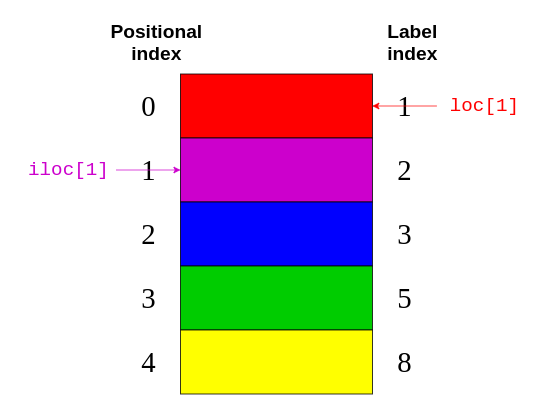

In [52]:
colors.iloc[1:3]

2    purple
3      blue
dtype: object

In [53]:
colors.loc[1:3]

1       red
2    purple
3      blue
dtype: object

In [54]:
colors.loc[3:8]

3      blue
5     green
8    yellow
dtype: object

Anda dapat menggunakan blok kode di atas untuk membedakan antara dua perilaku Series:
- Anda dapat menggunakan .iloc yang Series mirip dengan menggunakan [] pada list .
- Anda dapat menggunakan .loc yang Series mirip dengan menggunakan [] pada dictioary

#Accessing DataFrame Elements

Karena DataFrame terdiri dari Series objek, Anda dapat menggunakan alat yang sama untuk mengakses elemennya. Perbedaan penting adalah dimensi tambahan dari DataFrame. Anda akan menggunakan operator pengindeksan untuk kolom dan metode akses .loc dan .iloc pada baris.

In [55]:
city_data["revenue"]

Amsterdam    4200
Tokyo        6500
Toronto      8000
Name: revenue, dtype: int64

Jika nama kolom adalah string, maka Anda dapat menggunakan akses gaya atribut dengan notasi titik juga:

In [56]:
city_data.revenue

Amsterdam    4200
Tokyo        6500
Toronto      8000
Name: revenue, dtype: int64

In [57]:
toys = pd.DataFrame([
{"name": "ball", "shape": "sphere"},
{"name": "Rubik's cube", "shape": "cube"}
])

toys["shape"]

0    sphere
1      cube
Name: shape, dtype: object

In [58]:
toys.shape

(2, 2)

**Using .loc and .iloc**

In [59]:
city_data.loc["Amsterdam"]

revenue           4200.0
employee_count       5.0
Name: Amsterdam, dtype: float64

In [60]:
city_data.loc["Tokyo": "Toronto"]

,revenue,employee_count
Tokyo,6500,8.0
Toronto,8000,NaN


In [61]:
city_data.iloc[1]

revenue           6500.0
employee_count       8.0
Name: Tokyo, dtype: float64

Setiap baris kode memilih baris yang berbeda dari city_data:

- city_data.loc["Amsterdam"] memilih baris dengan indeks label "Amsterdam".
- city_data.loc["Tokyo": "Toronto"] memilih baris dengan indeks label dari "Tokyo"ke "Toronto". Ingat, .locinklusif.
- city_data.iloc[1] memilih baris dengan indeks posisi 1, yaitu "Tokyo".

Untuk DataFrame, metode akses data .loc dan .iloc juga menerima parameter kedua. Sementara parameter pertama memilih baris berdasarkan indeks, parameter kedua memilih kolom. Anda dapat menggunakan parameter ini bersama-sama untuk memilih subset baris dan kolom dari DataFrame:

In [62]:
city_data.loc["Amsterdam": "Tokyo", "revenue"]

Amsterdam    4200
Tokyo        6500
Name: revenue, dtype: int64

menggunakan data nba

In [63]:
nba.loc[5555:5559, ["fran_id", "opp_fran", "pts", "opp_pts"]]

,fran_id,opp_fran,pts,opp_pts
5555,Pistons,Warriors,83,56
5556,Celtics,Knicks,95,74
5557,Knicks,Celtics,74,95
5558,Kings,Sixers,81,86
5559,Sixers,Kings,86,81


#Querying Your Dataset

Anda telah melihat cara mengakses subset dari kumpulan data besar berdasarkan indeksnya. Sekarang, Anda akan memilih baris berdasarkan nilai di kolom kumpulan data untuk mengkueri data Anda. Misalnya, Anda dapat membuat DataFramegame baru yang hanya berisi game yang dimainkan setelah 2010:

In [64]:
current_decade = nba[nba["year_id"] > 2010]
current_decade.shape

(12658, 24)

In [65]:
current_decade

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,date_played
113656,56829,201010260BOS,NBA,1,2011,10/26/2010,1,0,MIA,Heat,80,1547.3638,1543.1600,45.141479,BOS,Celtics,88,1625.0994,1629.3031,A,L,0.264418,NaN,2010-10-26
113657,56829,201010260BOS,NBA,0,2011,10/26/2010,1,0,BOS,Celtics,88,1625.0994,1629.3031,53.754559,MIA,Heat,80,1547.3638,1543.1600,H,W,0.735582,NaN,2010-10-26
113658,56830,201010260LAL,NBA,1,2011,10/26/2010,1,0,HOU,Rockets,110,1504.1956,1502.5969,40.900764,LAL,Lakers,112,1647.6016,1649.2002,A,L,0.197632,NaN,2010-10-26
113659,56830,201010260LAL,NBA,0,2011,10/26/2010,1,0,LAL,Lakers,112,1647.6016,1649.2002,55.608730,HOU,Rockets,110,1504.1956,1502.5969,H,W,0.802368,NaN,2010-10-26
113660,56831,201010260POR,NBA,1,2011,10/26/2010,1,0,PHO,Suns,92,1643.0225,1630.6204,53.879230,POR,Trailblazers,106,1552.8141,1565.2162,A,L,0.485912,NaN,2010-10-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,82,1723.4149,1704.3949,60.309792,GSW,Warriors,103,1790.9591,1809.9791,H,L,0.546572,NaN,2015-06-11
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,104,1809.9791,1813.6349,68.013329,CLE,Cavaliers,91,1704.3949,1700.7391,H,W,0.765565,NaN,2015-06-14
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,1704.3949,1700.7391,60.010067,GSW,Warriors,104,1809.9791,1813.6349,A,L,0.234435,NaN,2015-06-14
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,97,1700.7391,1692.0859,59.290245,GSW,Warriors,105,1813.6349,1822.2881,H,L,0.481450,NaN,2015-06-16


In [66]:
games_with_notes = nba[nba["notes"].notnull()]
games_with_notes.shape

(5424, 24)

In [67]:
games_with_notes.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,date_played
930,466,194801300BLB,NBA,1,1948,1/30/1948,28,0,WSC,Capitols,71,1469.3469,1454.9012,47.065742,BLB,Baltimore,95,1434.0548,1448.5005,A,L,0.407940,at Baltimore's Fifth Regiment Armory,1948-01-30
931,466,194801300BLB,NBA,0,1948,1/30/1948,31,0,BLB,Baltimore,95,1434.0548,1448.5005,46.407490,WSC,Capitols,71,1469.3469,1454.9012,H,W,0.592060,at Baltimore's Fifth Regiment Armory,1948-01-30
1084,543,194803230CHS,NBA,1,1948,3/23/1948,49,1,WSC,Capitols,70,1465.9006,1461.1990,47.710297,CHS,Stags,74,1440.7186,1445.4203,A,L,0.393962,Tiebreaker,1948-03-23
1085,543,194803230CHS,NBA,0,1948,3/23/1948,49,1,CHS,Stags,74,1440.7186,1445.4203,46.089687,WSC,Capitols,70,1465.9006,1461.1990,H,W,0.606038,Tiebreaker,1948-03-23
1088,545,194803250CHS,NBA,1,1948,3/25/1948,49,1,BLB,Baltimore,75,1477.2552,1484.3137,50.044666,CHS,Stags,72,1445.4203,1438.3618,A,W,0.403142,Tiebreaker,1948-03-25


In [68]:
ers = nba[nba["fran_id"].str.endswith("ers")]
ers.shape

(27797, 24)

In [69]:
ers.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,date_played
7,4,194611020PRO,NBA,0,1947,11/2/1946,1,0,PRO,Steamrollers,59,1300.0000,1305.1542,41.540619,BOS,Celtics,53,1300.0000,1294.8458,H,W,0.640065,NaN,1946-11-02
9,5,194611020STB,NBA,0,1947,11/2/1946,1,0,STB,Bombers,56,1300.0000,1304.6908,41.492020,PIT,Ironmen,51,1300.0000,1295.3092,H,W,0.640065,NaN,1946-11-02
16,9,194611050DTF,NBA,1,1947,11/5/1946,2,0,STB,Bombers,53,1304.6908,1312.8473,42.347137,DTF,Falcons,49,1279.6189,1271.4624,A,W,0.393811,NaN,1946-11-05
20,11,194611070PRO,NBA,0,1947,11/7/1946,2,0,PRO,Steamrollers,73,1305.1542,1311.5032,42.206284,CHS,Stags,65,1316.0840,1309.7350,H,W,0.625446,NaN,1946-11-07
22,12,194611070STB,NBA,0,1947,11/7/1946,3,0,STB,Bombers,63,1312.8473,1302.5988,41.272594,NYK,Knicks,68,1297.0712,1307.3197,H,L,0.660710,NaN,1946-11-07


Anda dapat menggunakan .str.endswith()untuk memfilter kumpulan data Anda dan menemukan semua game yang nama tim tuan rumah diakhiri dengan "ers".

Lakukan pencarian untuk game Baltimore di mana kedua tim mencetak lebih dari 100 poin. Untuk melihat setiap game hanya sekali, Anda harus mengecualikan duplikat:

In [70]:
nba[
(nba["_iscopy"] == 0) &
(nba["pts"] > 100) &
(nba["opp_pts"] > 100) &
(nba["team_id"] == "BLB")
]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,date_played
1726,864,194902260BLB,NBA,0,1949,2/26/1949,53,0,BLB,Baltimore,114,1421.9351,1419.4280,38.557545,MNL,Lakers,115,1637.9852,1640.4923,H,L,0.338936,NaN,1949-02-26
4890,2446,195301100BLB,NBA,0,1953,1/10/1953,32,0,BLB,Baltimore,126,1328.6687,1356.6470,25.797792,BOS,Celtics,105,1591.1434,1563.1652,H,W,0.281855,NaN,1953-01-10
4909,2455,195301140BLB,NBA,0,1953,1/14/1953,34,0,BLB,Baltimore,104,1349.8323,1346.3594,24.876236,MNL,Lakers,112,1665.4396,1668.9125,H,L,0.224238,NaN,1953-01-14
5208,2605,195303110BLB,NBA,0,1953,3/11/1953,66,0,BLB,Baltimore,107,1284.5239,1282.2396,19.579676,NYK,Knicks,113,1649.1516,1651.4359,H,L,0.178973,at Boston MA,1953-03-11
5825,2913,195402220BLB,NBA,0,1954,2/22/1954,60,0,BLB,Baltimore,110,1303.7493,1301.9685,20.736986,BOS,Celtics,111,1591.4943,1593.2749,H,L,0.253365,at Worcester MA,1954-02-22


Di sini, Anda gunakan nba["_iscopy"] == 0 untuk menyertakan hanya entri yang bukan salinan.

In [71]:
nba[
(nba["_iscopy"] == 0) &
(nba["team_id"].str.startswith("LA")) &
(nba["year_id"]==1992) &
(nba["notes"].notnull())
]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,date_played
68901,34451,199205030LAC,NBA,0,1992,5/3/1992,86,1,LAC,Clippers,115,1546.9009,1556.0005,47.888252,UTA,Jazz,107,1647.5092,1638.4095,H,W,0.499125,"at Anaheim, CA (Anaheim Convention Center)",1992-05-03
68903,34452,199205030LAL,NBA,0,1992,5/3/1992,86,1,LAL,Lakers,76,1489.6460,1474.3994,39.395412,POR,Trailblazers,102,1655.1210,1670.3677,H,L,0.406874,"at Las Vegas, NV",1992-05-03


#Grouping and Aggregating Your Data

Series memiliki lebih dari dua puluh metode berbeda untuk menghitung statistik deskriptif. Berikut beberapa contohnya:

In [72]:
city_revenues.sum()

18700

In [73]:
city_revenues.max()

8000

kita coba dengan data nba

In [74]:
points = nba["pts"]

In [75]:
type(points)

pandas.core.series.Series

In [76]:
points.sum()

12976235

sebuah DataFrame dapat memiliki beberapa kolom, yang memperkenalkan kemungkinan baru untuk agregasi, seperti grouping :

In [77]:
nba.groupby("fran_id", sort=False)["pts"].sum()

fran_id
Huskies           3995
Knicks          582497
Stags            20398
Falcons           3797
Capitols         22387
Celtics         626484
Steamrollers     12372
Ironmen           3674
Bombers          17793
Rebels            4474
Warriors        591224
Baltimore        37219
Jets              4482
Pistons         572758
Lakers          637444
Kings           569245
Hawks           567261
Denver            4818
Olympians        22864
Redskins          5372
Waterloo          4921
Packers           6193
Sixers          585891
Wizards         474809
Bulls           437269
Thunder         437735
Squires          91127
Stars            84940
Rockets         432504
Colonels         94435
Pacers          438288
Nuggets         445780
Spurs           453822
Spirits          85874
Sounds           75582
Floridians       49568
Nets            417809
Condors          49642
Bucks           418326
Suns            437486
Clippers        380523
Cavaliers       380416
Trailblazers    402695
Sai

In [78]:
nba[
(nba["fran_id"] == "Spurs") &
(nba["year_id"] > 2010)
].groupby(["year_id", "game_result"])["game_id"].count()

year_id  game_result
2011     L              25
         W              63
2012     L              20
         W              60
2013     L              30
         W              73
2014     L              27
         W              78
2015     L              31
         W              58
Name: game_id, dtype: int64

Lihatlah musim 2014-15 Golden State Warriors ( year_id: 2015). Berapa banyak kemenangan dan kekalahan yang mereka cetak selama musim reguler dan babak playoff?

In [79]:
nba[
(nba["fran_id"] == "Warriors") &
(nba["year_id"] == 2015)
].groupby(["is_playoffs", "game_result"])["game_id"].count()

is_playoffs  game_result
0            L              15
             W              67
1            L               5
             W              16
Name: game_id, dtype: int64

is_playoffs=0 menunjukkan hasil untuk musim reguler, dan is_playoffs=1 menunjukkan hasil untuk babak playoff.

#Manipulating Columns

Anda harus tahu cara memanipulasi kolom kumpulan data Anda dalam berbagai fase proses analisis data. Anda dapat menambahkan dan melepaskan kolom sebagai bagian dari fase pembersihan data awal , atau lebih baru berdasarkan wawasan analisis Anda.

Buat salinan asli Anda DataFrameuntuk bekerja dengan:

In [80]:
df = nba.copy()
df.shape

(126314, 24)

Anda dapat menentukan kolom baru berdasarkan yang sudah ada:

In [81]:
df["difference"] = df.pts - df.opp_pts
df.shape

(126314, 25)

Di sini, Anda menggunakan "pts"dan "opp_pts"kolom untuk membuat yang baru bernama "difference". Kolom baru ini memiliki fungsi yang sama dengan yang lama:

In [82]:
df["difference"].max()

68

Di sini, Anda menggunakan fungsi agregasi .max() untuk menemukan nilai terbesar dari kolom baru Anda.

Anda juga dapat mengganti nama kolom kumpulan data Anda. Tampaknya "game_result" dan "game_location" terlalu bertele-tele, jadi lanjutkan dan ganti namanya sekarang:

In [83]:
renamed_df = df.rename(
columns={"game_result": "result", "game_location": "location"}
)

renamed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 25 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   gameorder    126314 non-null  int64         
 1   game_id      126314 non-null  object        
 2   lg_id        126314 non-null  object        
 3   _iscopy      126314 non-null  int64         
 4   year_id      126314 non-null  int64         
 5   date_game    126314 non-null  object        
 6   seasongame   126314 non-null  int64         
 7   is_playoffs  126314 non-null  int64         
 8   team_id      126314 non-null  object        
 9   fran_id      126314 non-null  object        
 10  pts          126314 non-null  int64         
 11  elo_i        126314 non-null  float64       
 12  elo_n        126314 non-null  float64       
 13  win_equiv    126314 non-null  float64       
 14  opp_id       126314 non-null  object        
 15  opp_fran     126314 non-null  obje

Perhatikan bahwa ada objek baru, renamed_df. Seperti beberapa metode manipulasi data lainnya, .rename() mengembalikan DataFrame yang baru secara default. Jika Anda ingin memanipulasi DataFrame yang asli secara langsung, maka sediakan .rename() serta inplace parameter yang dapat Anda atur ke True.

Anda dapat menghapus empat kolom yang terkait dengan Elo:

In [84]:
df.shape

(126314, 25)

In [85]:
elo_columns = ["elo_i", "elo_n", "opp_elo_i", "opp_elo_n"]

In [86]:
df.drop(elo_columns, inplace=True, axis=1)

In [87]:
df.shape

(126314, 21)

Saat Anda menghapus empat kolom Elo, jumlah total kolom turun menjadi 21.

#Specifying Data Types

Sepuluh kolom Anda memiliki tipe data object. namun kita dapat mengubah type dataa date_game:

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   gameorder      126314 non-null  int64         
 1   game_id        126314 non-null  object        
 2   lg_id          126314 non-null  object        
 3   _iscopy        126314 non-null  int64         
 4   year_id        126314 non-null  int64         
 5   date_game      126314 non-null  object        
 6   seasongame     126314 non-null  int64         
 7   is_playoffs    126314 non-null  int64         
 8   team_id        126314 non-null  object        
 9   fran_id        126314 non-null  object        
 10  pts            126314 non-null  int64         
 11  win_equiv      126314 non-null  float64       
 12  opp_id         126314 non-null  object        
 13  opp_fran       126314 non-null  object        
 14  opp_pts        126314 non-null  int64         
 15  

In [89]:
df["date_game"] = pd.to_datetime(df["date_game"])

Di sini, Anda gunakan .to_datetime() untuk menentukan semua tanggal permainan sebagai datetime objek.

Kolom lain berisi teks yang sedikit lebih terstruktur.  kolom game_location hanya dapat memiliki tiga nilai yang berbeda:

In [90]:
df["game_location"].nunique()

3

In [91]:
df["game_location"].value_counts()

H    63138
A    63138
N       38
Name: game_location, dtype: int64

menjadikan type data categorical

In [92]:
df["game_location"] = pd.Categorical(df["game_location"])
df["game_location"].dtype

CategoricalDtype(categories=['A', 'H', 'N'], ordered=False)

categorical data memiliki beberapa keunggulan dibandingkan teks tidak terstruktur. Saat Anda menentukan tipe data categorical, Anda membuat validasi lebih mudah dan menghemat banyak memori, karena Pandas hanya akan menggunakan nilai unik secara internal. Semakin tinggi rasio nilai total dengan nilai unik, semakin banyak penghematan ruang yang akan Anda dapatkan.

Jalankan df.info() lagi. Anda akan melihat bahwa mengubah type data game_location dari object menjadi categorical telah mengurangi penggunaan memori.

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   gameorder      126314 non-null  int64         
 1   game_id        126314 non-null  object        
 2   lg_id          126314 non-null  object        
 3   _iscopy        126314 non-null  int64         
 4   year_id        126314 non-null  int64         
 5   date_game      126314 non-null  datetime64[ns]
 6   seasongame     126314 non-null  int64         
 7   is_playoffs    126314 non-null  int64         
 8   team_id        126314 non-null  object        
 9   fran_id        126314 non-null  object        
 10  pts            126314 non-null  int64         
 11  win_equiv      126314 non-null  float64       
 12  opp_id         126314 non-null  object        
 13  opp_fran       126314 non-null  object        
 14  opp_pts        126314 non-null  int64         
 15  